### Ce script permet de:
- filtrer les données pour nos analyses: 
  - Selectionne seulement les données après 2016

## Packages 

In [17]:
import pandas as pd
import seaborn as sns

## Open Data 

In [18]:
# Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_day_for_analysis.csv')
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

## Filtering from 2016

In [19]:
#select from 2016 to 2023
data_day = data_day[(data_day['year'] >= 2016)]

## Filtering observation period (day min - day max)

In [20]:
data_day.date_dt.max()

'2023-10-28'

In [21]:
data_day.groupby(['year']).date_dt.min() # 18 juillet limite

year
2016    2016-07-15
2017    2017-07-15
2018    2018-07-14
2019    2019-07-15
2020    2020-07-18
2021    2021-07-15
2022    2022-07-15
2023    2023-07-05
Name: date_dt, dtype: object

In [22]:
data_day.groupby(['year']).date_dt.max() # 13 octobre limite

year
2016    2016-10-15
2017    2017-10-14
2018    2018-10-13
2019    2019-10-25
2020    2020-10-17
2021    2021-10-28
2022    2022-10-18
2023    2023-10-28
Name: date_dt, dtype: object

In [23]:
condition_start = (data_day['month'] == 7) & (data_day['day'] < 18)
data_day_filtered_start = data_day[~condition_start]
data_day_filtered_start.groupby(['year']).date_dt.min()

year
2016    2016-07-18
2017    2017-07-18
2018    2018-07-18
2019    2019-07-18
2020    2020-07-18
2021    2021-07-18
2022    2022-07-18
2023    2023-07-18
Name: date_dt, dtype: object

In [24]:
condition_end = (data_day['month'] == 10) & (data_day['day'] > 13)
data_day_filtered = data_day_filtered_start[~condition_end]
data_day_filtered.groupby(['year']).date_dt.max()

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_17564/3309597897.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_day_filtered = data_day_filtered_start[~condition_end]


year
2016    2016-10-04
2017    2017-10-08
2018    2018-10-13
2019    2019-10-10
2020    2020-10-08
2021    2021-10-13
2022    2022-10-13
2023    2023-10-13
Name: date_dt, dtype: object

## Observers cleaning

In [25]:
data_day_filtered.head(2)

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,weather,windspeed_bfr,wind_ms,winddirection,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature
649,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,NaN,3.0,4.0,zw,1.0,NaN,NaN,NaN,10000.0,21.0
650,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,NaN,3.0,4.0,zw,1.0,NaN,NaN,NaN,10000.0,21.0


In [26]:
# Filter the DataFrame to keep only rows with NaN values in the 'observers' column
nan_observers = data_day_filtered[data_day_filtered['observerspresent'].isna()]

# Count the number of dates with NaN values in the 'observers' column
nan_observers_count = nan_observers['date_dt'].nunique()
print(nan_observers_count/data_day.date_dt.nunique()*100)

#print(data_day.date_dt.nunique())

29.72560975609756


In [27]:
nan_observers['date_dt'].nunique()

195

In [28]:
# How many dates have no observers names?
nan_observers_dates = data_day_filtered[data_day_filtered['observers'].isna()]['date_dt'].unique()
len(nan_observers_dates)

3

In [29]:
# Delete rows that have dates in 'nan_observers_dates'
cleaned_data_day = data_day_filtered[~data_day_filtered['date_dt'].isin(nan_observers_dates)]

In [30]:
date_observors = cleaned_data_day[['date_dt','observers']].drop_duplicates()
date_observors

,date_dt,observers
649,2016-07-18,"MR, LDG, MC, Mijo Gariou"
657,2016-07-19,"MR, QD, LDG, GS"
664,2016-07-20,"MR, MC"
670,2016-07-23,"MR, LDG, QD, GS"
678,2016-07-24,"MR, QD, LDG, GV"
...,...,...
12589,2023-10-08,"Guénolé CHAVRIER, Tiphaine CAUSSE, Carmen ELIE..."
12621,2023-10-10,"Guénolé CHAVRIER, Tiphaine CAUSSE, Carmen ELIE..."
12648,2023-10-11,"Guénolé CHAVRIER, Tiphaine CAUSSE, Carmen ELIE..."
12670,2023-10-12,Jean-louis GRANGÉ


In [31]:
# Function to count unique names in a single cell
def count_unique_names(cell_value):
    # Split the cell value into a list of names
    names = [name.strip() for name in cell_value.split(',')]
    # Count unique names
    unique_names = set(names)
    return len(unique_names)

In [33]:
cleaned_data_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11466 entries, 649 to 12705
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_dt           11466 non-null  object 
 1   year              11466 non-null  int64  
 2   month             11466 non-null  int64  
 3   day               11466 non-null  int64  
 4   start_time        11448 non-null  object 
 5   stop_time         11448 non-null  object 
 6   day_duration      11448 non-null  float64
 7   observers         11466 non-null  object 
 8   observersactive   9087 non-null   float64
 9   observerspresent  8863 non-null   float64
 10  species           11448 non-null  object 
 11  direction1        11448 non-null  float64
 12  direction2        11448 non-null  float64
 13  maxlocal          11448 non-null  float64
 14  weather           9218 non-null   object 
 15  windspeed_bfr     8199 non-null   float64
 16  wind_ms           8199 non-null   floa

In [32]:
# Apply the function to the 'names' column
cleaned_data_day['n_observers'] = cleaned_data_day['observers'].apply(count_unique_names)


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_17564/3689962351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_day['n_observers'] = cleaned_data_day['observers'].apply(count_unique_names)


In [18]:
# Export cleaned_data_day (with n_observers)
cleaned_data_day.to_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv', index = False)


## Species selection for analysis (based on abundance, only migration data)

### A) Absolute Abundance

In [24]:
data_day = data_day_filtered.loc[data_day_filtered['direction1'] > 0]

In [25]:
# Calculate mean abundance per species per year
abundance_per_species_and_year = data_day.groupby(['species', 'year'])['direction1'].sum().reset_index()

# Sort by year and mean abundance
abundance_per_species_and_year = abundance_per_species_and_year.sort_values(by=['year', 'direction1'], ascending=[True, False])

# Get top 5 species per year
top_3_species_per_year = abundance_per_species_and_year.groupby('year').head(3).reset_index(drop=True)
top_5_species_per_year = abundance_per_species_and_year.groupby('year').head(5).reset_index(drop=True)

# Display the result
print(top_3_species_per_year)

                  species  year  direction1
0              Milan noir  2016     44157.0
1         Bondrée apivore  2016      4517.0
2   Hirondelle de fenêtre  2016      1436.0
3              Milan noir  2017     43164.0
4           Martinet noir  2017      8449.0
5         Bondrée apivore  2017      4920.0
6              Milan noir  2018     46090.0
7         Bondrée apivore  2018      6232.0
8           Martinet noir  2018      1708.0
9              Milan noir  2019     57042.0
10        Bondrée apivore  2019      5546.0
11            Milan royal  2019      1780.0
12             Milan noir  2020     67109.0
13        Bondrée apivore  2020      5229.0
14            Milan royal  2020       773.0
15          Martinet noir  2021     60508.0
16             Milan noir  2021     57600.0
17    Hirondelle rustique  2021     18912.0
18          Martinet noir  2022     71797.0
19             Milan noir  2022     51477.0
20  Hirondelle de fenêtre  2022     31264.0
21             Milan noir  2023 

In [26]:
top_3_species_per_year.species.unique()

array(['Milan noir', 'Bondrée apivore', 'Hirondelle de fenêtre',
       'Martinet noir', 'Milan royal', 'Hirondelle rustique'],
      dtype=object)

In [27]:
top_5_species_per_year

,species,year,direction1
0,Milan noir,2016,44157.0
1,Bondrée apivore,2016,4517.0
2,Hirondelle de fenêtre,2016,1436.0
3,Hirondelle rustique,2016,662.0
4,Milan royal,2016,561.0
5,Milan noir,2017,43164.0
6,Martinet noir,2017,8449.0
7,Bondrée apivore,2017,4920.0
8,Hirondelle rustique,2017,3814.0
9,Milan royal,2017,2991.0


In [28]:
top_5_species_per_year.species.unique()

array(['Milan noir', 'Bondrée apivore', 'Hirondelle de fenêtre',
       'Hirondelle rustique', 'Milan royal', 'Martinet noir',
       'Cigogne blanche', 'Cigogne noire', 'Épervier d’Europe',
       'hirondelle spec.'], dtype=object)

In [29]:
top_3_species_per_year.head()

,species,year,direction1
0,Milan noir,2016,44157.0
1,Bondrée apivore,2016,4517.0
2,Hirondelle de fenêtre,2016,1436.0
3,Milan noir,2017,43164.0
4,Martinet noir,2017,8449.0


<AxesSubplot:xlabel='year', ylabel='direction1'>

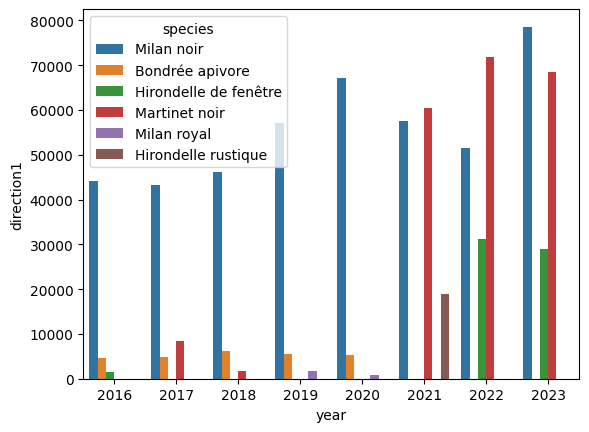

In [30]:
sns.barplot(data=top_3_species_per_year, x='year', y='direction1', hue='species')

### B) Species list: Milan noir, Bondrée apivore, Milan royal = data_day_milan_noir_bondree_milan_royal

In [33]:
# Filter for specific species
data_day_milan_noir_bondree_milan_royal = cleaned_data_day[cleaned_data_day['species'].isin( ['Milan noir', 'Bondrée apivore', 'Milan royal'])]
data_day_milan_noir_bondree_milan_royal = data_day_milan_noir_bondree_milan_royal.loc[data_day_milan_noir_bondree_milan_royal['direction1'] > 0]

In [34]:
data_day_milan_noir_bondree_milan_royal.head()

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
655,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,1.0,NaN,NaN,NaN,10000.0,21.0,4,47.0,0.0,0.0
662,2016-07-19,2016,7,19,06:36:00,16:47:00,10.183333,"MR, QD, LDG, GS",4.0,NaN,...,2.0,NaN,NaN,NaN,12000.0,34.0,4,42.5,0.0,0.0
664,2016-07-20,2016,7,20,06:54:00,16:15:00,9.350000,"MR, MC",2.0,NaN,...,6.0,15000.0,mist,NaN,7000.0,17.0,2,0.5,0.0,0.0
676,2016-07-23,2016,7,23,07:02:00,17:00:00,9.966667,"MR, LDG, QD, GS",3.0,NaN,...,4.0,2600.0,NaN,NaN,7000.0,16.0,4,380.5,0.0,0.0
678,2016-07-24,2016,7,24,07:00:00,13:32:00,6.533333,"MR, QD, LDG, GV",3.0,NaN,...,8.0,1400.0,mist,NaN,2000.0,15.0,4,46.0,0.0,0.0


In [35]:
# Export data_day table (for analysis) to csv in the folder 'tableaux_finaux' (you to create this folder manually before)
data_day_milan_noir_bondree_milan_royal.to_csv('../raw_data/Trektellen/tableaux_finaux/data_day_milan_noir_bondree_milan_royal.csv', index = False)